Alvin Aditiya 3F 04 2341720020

#Kuis 1

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset \"Census Income\". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

In [7]:
# Install UCI REPO Library
!pip install -q ucimlrepo

# Import Required Libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# fetch data
adult_income = fetch_ucirepo(id=2)


In [9]:
# Data
X = adult_income.data.features
y = adult_income.data.targets
df = pd.concat([X, y], axis=1)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Data Size
df.shape


(48842, 15)

In [11]:
# Inspect metadata
adult_income.metadata


{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

Soal 1 (5 poin)

        "1.   Lakukan inspeksi profile data
        "2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?

In [12]:
#Inspeksi Profil Data
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [13]:
# Jumlah missing value tiap kolom
df.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Soal 2 (5 poin)

        "1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
        "2. Cek kembali apakah masih terdapat data yang hilang

In [14]:
# Ubah tanda '?' menjadi NaN (kalau belum)
df = df.replace('NaN', np.nan)

In [15]:
# Imputasi setiap kolom kategorikal dengan modus
for col in ['workclass','occupation','native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Cek ulang apakah masih ada missing
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-76311515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Soal 3 (10 poin)

        "Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**,
        **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian

In [16]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [17]:
for col in cat_cols:
    print(f"\nKolom {col}:\n", df[col].value_counts(dropna=False))



Kolom workclass:
 workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Kolom education:
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Kolom marital-status:
 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Kolom occupation:
 oc

In [18]:
# Hilangkan spasi depan-belakang
for col in cat_cols:
    df[col] = df[col].str.strip()

# Contoh: ganti kategori langka menjadi 'Others'
# misalnya negara dengan <100 occurrence
rare_countries = df['native-country'].value_counts()[df['native-country'].value_counts()<100].index
df['native-country'] = df['native-country'].replace(rare_countries, 'Others')

# Kalau ada penulisan ganda pada workclass:
df['workclass'] = df['workclass'].replace({
    'Self-emp-not-inc':'Self-emp-not-inc',  # tetap
    'Self emp not inc':'Self-emp-not-inc'   # kesalahan → dibetulkan
})

# Atau ganti semua nilai tidak sesuai yang kamu temukan:
# df['occupation'] = df['occupation'].replace({'?':'Others'})


In [19]:
for col in cat_cols:
    print(f"\nKolom {col} (sesudah dibersihkan):\n", df[col].value_counts())



Kolom workclass (sesudah dibersihkan):
 workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Kolom education (sesudah dibersihkan):
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Kolom marital-status (sesudah dibersihkan):
 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-sp

# Bagian 2 - Visual Inspection

Soal 1 - Visualisasi Data (20 poin)

        "Lakukan inspeksi visual pada
        "1. Pada kolom 'age' dengan menggunakan histrogram
        "2. Pada kolom 'education' education menggunakan barchart
        "3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
        "4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)"

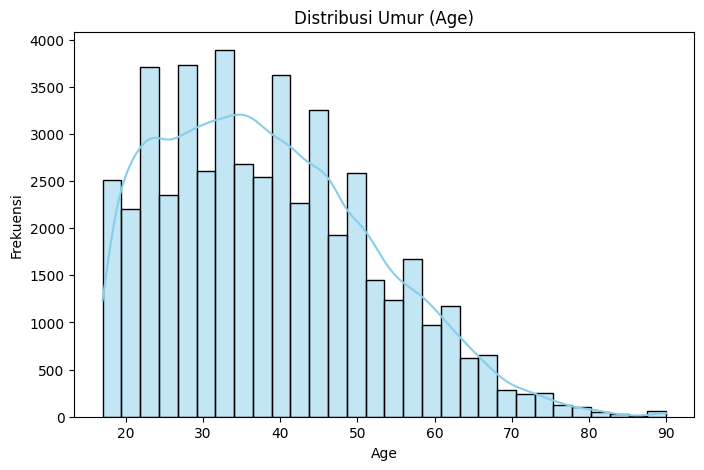

In [20]:
#Histogram Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Umur (Age)')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

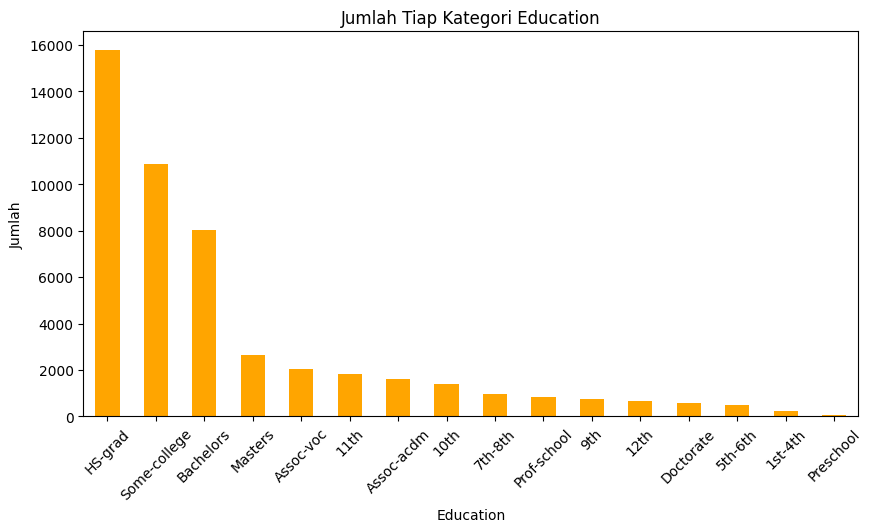

In [21]:
#Barchart Kolom
plt.figure(figsize=(10,5))
df['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Jumlah Tiap Kategori Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2739012243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')


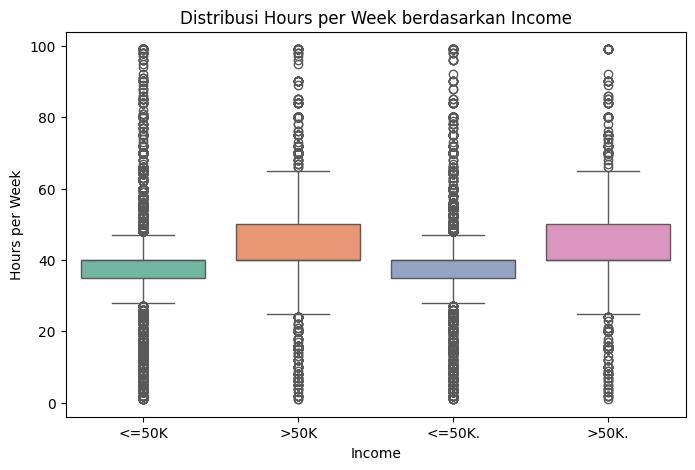

In [22]:
#Boxplot hours-per-week dikelompokkan berdasarkan income
plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')
plt.title('Distribusi Hours per Week berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

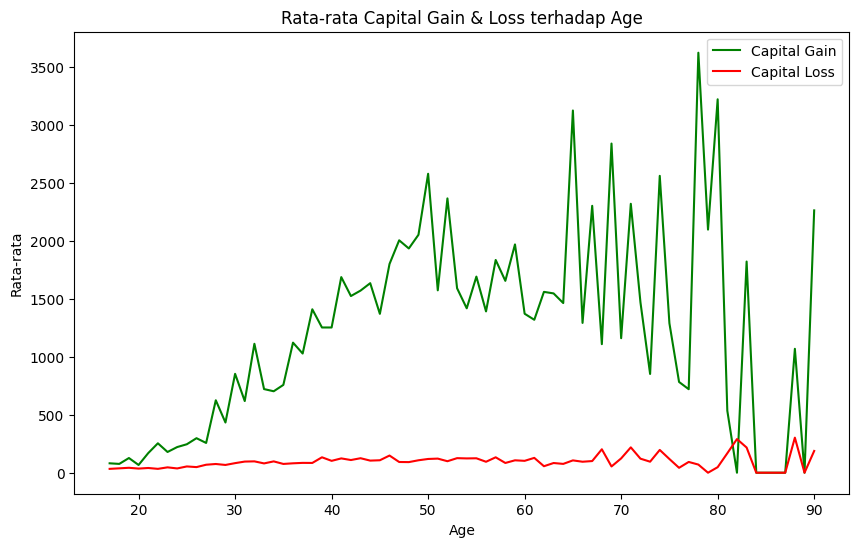

In [23]:
#Lineplot age terhadap capital-gain dan capital-loss

# hitung rata-rata capital gain dan loss per age
age_stats = df.groupby('age')[['capital-gain','capital-loss']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='capital-gain', data=age_stats, label='Capital Gain', color='green')
sns.lineplot(x='age', y='capital-loss', data=age_stats, label='Capital Loss', color='red')
plt.title('Rata-rata Capital Gain & Loss terhadap Age')
plt.xlabel('Age')
plt.ylabel('Rata-rata')
plt.legend()
plt.show()


Soal 2 - Analisis Visual (15 poin)

        "1. Fenomena apa yang terjadi pada distribusi data 'age'?
        "2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
        "3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?"

In [25]:
df['age'] = df['age'].fillna(df['age'].median())

#1. Histogram (age) pada data Adult cenderung right–skewed : paling banyak orang di usia 20–45 tahun, makin sedikit di atas 60
#   Ada “lonjakan” kecil di sekitar 90 tahun distribusi tidak normal sempurna, melainkan miring ke kanan dengan beberapa nilai ekstrem (outlier usia tinggi).

#2. Median lebih aman dibanding mean untuk data miring (skewed), supaya outlier tidak terlalu mempengaruhi imputasi.
#   Alasannya median lebih robust terhadap outlier sehingga nilai imputasi tidak tertarik ke arah nilai ekstrem.

In [26]:
#3. Jumlah outlier pada hours-per-week per kategori income

import numpy as np

def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return ((group < lower) | (group > upper)).sum()

outlier_counts = df.groupby('income')['hours-per-week'].apply(count_outliers)
print(outlier_counts)


income
<=50K     7809
<=50K.    3897
>50K       510
>50K.      271
Name: hours-per-week, dtype: int64


# Bagian 3 - Encoding Variabel Kategorical

Soal 1 (5 poin)

        "Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [27]:
# Encoding kolom sex
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

# Encoding kolom income (target)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Cek hasilnya
print(df[['sex','income']].head())


   sex  income
0    1     0.0
1    1     0.0
2    1     0.0
3    1     0.0
4    0     0.0


# Bagian 4 - Analisis Korelasi

Soal 1 (10 poin)

        "1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
        "2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [28]:

# Pilih variabel yang diminta
cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']

corr_matrix = df[cols].corr(method='pearson')
print(corr_matrix)


                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.234037       0.335154        0.229689      0.223329   

                capital-loss    income  
age                 0.056944  0.234037  
education-num       0.080972  0.335154  
hours-per-week      0.054467  0.229689  
capital-gain       -0.031441  0.223329  
capital-loss        1.000000  0.150526  
income              0.150526  1.000000  


2. Semua variabel bernilai positif terhadap income → makin tinggi nilai variabel itu, makin besar kecenderungan penghasilan >50K (karena income sudah di-encode 0=≤50K, 1=>50K)
korelasi tertinggi ada pada education-num (≈0.34) → tingkat pendidikan paling kuat hubungannya dengan pendapatan.
Korelasi sedang pada age (≈0.23), hours-per-week (≈0.23) dan capital-gain (≈0.22) → orang yang lebih tua, bekerja lebih lama, dan punya capital gain cenderung punya income lebih tinggi.
Korelasi terendah pada capital-loss (≈0.15) → masih positif tapi pengaruhnya paling kecil.


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

        "Pada bagian ini, Anda diminta untuk melakukan proses
        EDA dan pra pengolahan data sederhana pada dataset MNIST.
        Dataset MNIST merupakan data citra tulisan tangan untuk
        digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda
        akan dibantu dengan proses loading data dan inspeksi data.

        "1. Hanya gunakan data **Test**
        "2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data).
        Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [31]:
#Load Dataset MNIST Test

# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


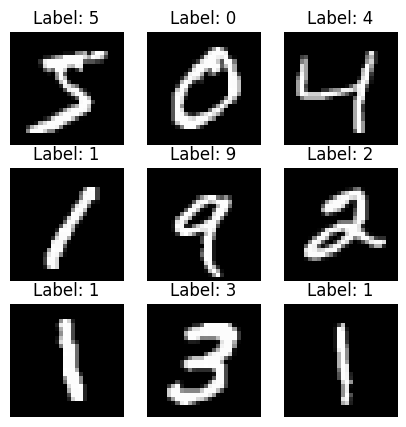

In [32]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

Soal 1 (10 poin)

        "1. Lakukan proses **upsampling** citra menjadi ukuran 32x32\
        "2. Tampilakan 5 data hasil proses **upsampling**\
        
        "Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat
        dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))"

In [39]:
#Upsampling MNIST Test ke 32×32

import cv2

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)


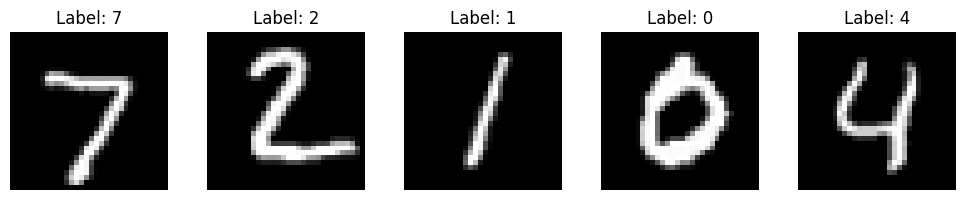

In [40]:
#Tampilkan 5 Data Hasil Upsampling

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Soal 2 (10 poin)

        "Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [41]:
X_test_normalized = X_test_upsampled.astype('float32') / 255.0

print("Nilai piksel min:", X_test_normalized.min())
print("Nilai piksel max:", X_test_normalized.max())
print("Shape:", X_test_normalized.shape)


Nilai piksel min: 0.0
Nilai piksel max: 1.0
Shape: (10000, 32, 32)


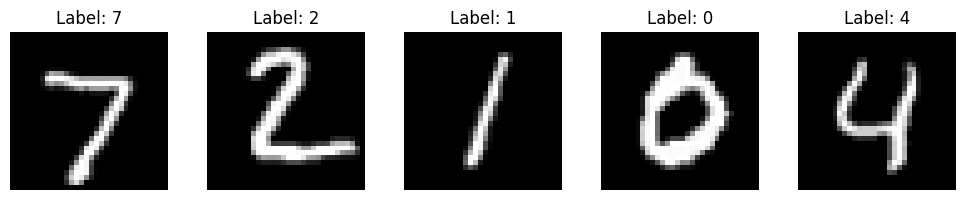

In [42]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_normalized[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Soal 3 (10 poin)

        "Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

        "Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [43]:
n_samples = X_test_normalized.shape[0]
X_test_flatten_manual = np.zeros((n_samples, 32*32))

for i in range(n_samples):
    X_test_flatten_manual[i] = X_test_normalized[i].flatten()

print("Shape baru:", X_test_flatten_manual.shape)


Shape baru: (10000, 1024)


In [44]:
print("Baris pertama:", X_test_flatten_manual[0][:20])

Baris pertama: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
